In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, dot
import cvxopt
from cvxopt import matrix, solvers

In [2]:
%qtconsole

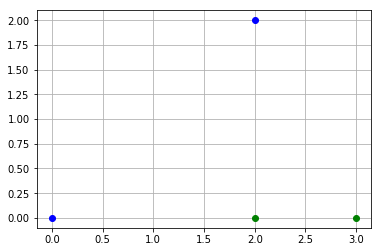

In [3]:
# X = np.array([[0,0],[2,2],[2,3],[3,0],[2,0],[1.5,0]])
# y = np.array([[-1],[-1],[-1],[1],[1],[1]])
X = np.array([[0,0],[2,2],[3,0],[2,0]])
y = np.array([[-1],[-1],[1],[1]])

N = np.shape(X)[0]

w = np.array([[1.2],[-3.2]])
b = -0.5

#Points de la matrice X
x_neg = [c[0] for c in X[0:N//2]]
y_neg = [c[1] for c in X[0:N//2]]
x_pos = [c[0] for c in X[N//2:N]]
y_pos = [c[1] for c in X[N//2:N]]

plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
plt.grid(True)
plt.show()

In [4]:
def marge_fonctionnelle(X,y,w,b):
    marge = 10e6
    for i in range(0,len(X)):
        dist = y[i][0]*(np.dot(np.transpose(w),X[i,:])+b)
        if dist < marge:
            marge = dist
    return marge

In [5]:
N = np.shape(X)[0]
Q = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Q[i,j] = y[i]*y[j]*np.dot(np.transpose(X[i]),X[j])

A = np.concatenate((np.transpose(y),-np.transpose(y)),axis=0)
A = np.concatenate((A,np.identity(N)),axis=0)

c = np.zeros((N+2,1))

p = -np.ones((N,1))

Q = cvxopt.matrix(Q)
p = cvxopt.matrix(p)
A = cvxopt.matrix(-A)
c = cvxopt.matrix(-c)

sol = solvers.qp(Q,p,A,c)

alpha_opt = sol['x']
w_opt = 0
for i in range(N):
    w_opt += y[i]*alpha_opt[i]*X[i]
    
b = []
for i in range(N):
    b.append(1/y[i]-np.dot(np.transpose(w_opt),X[i]))

b = []
for i in range(N):
    b.append(1/y[i]-np.dot(np.transpose(w_opt),X[i]))

marge = []
for i in range(N):
    marge.append(marge_fonctionnelle(X,y,w_opt,b[i]))

b_opt = b[marge.index(1)][0]

xx = np.arange(0,4,0.5)
coef_d = -w_opt[0]/w_opt[1]

yy_opt = [coef_d*e - b_opt/w_opt[1] for e in xx]

norme_w_opt = np.linalg.norm(w_opt)
dist = 1/norme_w_opt

yy_plus = [e + dist/np.cos(np.arctan(coef_d)) for e in yy_opt]
yy_moins = [e - dist/np.cos(np.arctan(coef_d)) for e in yy_opt]

     pcost       dcost       gap    pres   dres
 0: -1.0249e+00 -2.3063e+00  1e+01  3e+00  2e+00
 1: -8.2851e-01 -1.7889e+00  1e+00  1e-01  6e-02
 2: -9.8330e-01 -1.0720e+00  1e-01  4e-03  2e-03
 3: -9.9979e-01 -1.0008e+00  1e-03  4e-05  2e-05
 4: -1.0000e+00 -1.0000e+00  1e-05  4e-07  2e-07
 5: -1.0000e+00 -1.0000e+00  1e-07  4e-09  2e-09
Optimal solution found.


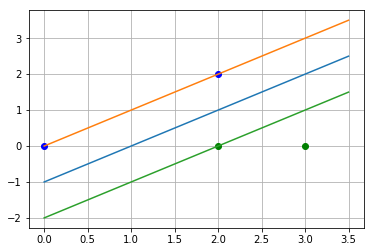

In [6]:
plt.plot(x_neg,y_neg,'bo')
plt.plot(x_pos,y_pos,'go')
plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus)
plt.plot(xx,yy_moins)
plt.grid(True)
plt.show()

In [7]:
def fonction_decision(x,w,b):
    return np.dot(np.transpose(w),x)+b